<a href="https://colab.research.google.com/github/caiogasparine/3253-Machine-Learning/blob/main/Caio_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Caio MNIST Dataset Code
#Book: Hands On ML
#February 8th 2023

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mnist = fetch_openml('mnist_784', as_frame=False)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [3]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

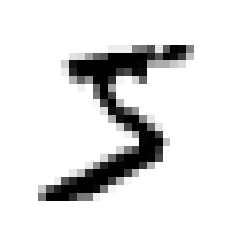

In [8]:
some_digit = X[0] 
plot_digit(some_digit)
plt.show()

In [9]:
y[0]

'5'

In [12]:
# X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [13]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [14]:
#data dimensions for X and y
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 784), (56000,), (14000, 784), (14000,))

In [15]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])


array(['5'], dtype='<U1')

In [17]:

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.89907323, 0.95859003, 0.81951141])